In [75]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from epypes import pipeline
from epypes import payload
from epypes.patterns import parallel, wpool

from rpa import cbcalib
from rpa.io import open_image

In [77]:
import math
import multiprocessing as mp
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

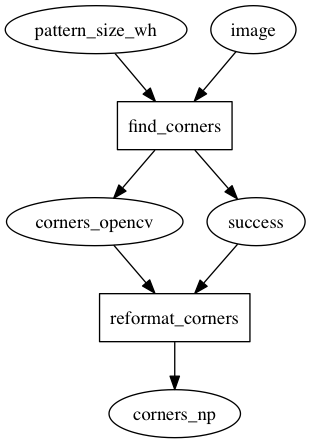

In [78]:
cg_corners = cbcalib.CGFindCorners()
nxpd.draw(cg_corners.to_networkx())

In [79]:
#im_filenames = glob(opj(CODE_DIR, 'DATA', 'IMG/calib/opencv_left', '*.jpg'))
im_filenames = glob(opj(CODE_DIR, 'DATA', 'IMG/calib/amct', 'cam0_*.tif'))[:15]
cb_images = [open_image(fname) for fname in im_filenames]

n_par = mp.cpu_count() 
to_freeze = {'pattern_size_wh': (8, 5)}

chessboarb_pipelines = [pipeline.Pipeline('CBC_{}'.format(i+1), cg_corners, to_freeze) for i in range(n_par)]

In [80]:
cb_pipe = chessboarb_pipelines[0]

for im in cb_images:
    cb_pipe.run(image=im)
    #print(cb_pipe.token_value('corners_np'))

In [81]:
im_groups = payload.equal_input_splitter(cb_images, n_par)
[len(grp) for grp in im_groups]

[4, 4, 4, 3]

In [82]:
#payload.split_payload_and_build_tokens(cb_images, n_par, payload.equal_input_splitter)

In [83]:
#ppn = parallel.ParallelPipesNode('chessboard_parallel', chessboarb_pipelines, payload.equal_input_splitter)

In [84]:
test_pipe = pipeline.Pipeline('test_pipe', cg_corners, {'pattern_size_wh': (8, 5)})
test_pipe.runner.token_manager.free_source_tokens

{'image'}

In [85]:
wpn = wpool.wpool_node_from_cgraph('corners_wpn', cg_corners, {'pattern_size_wh': (8, 5)}, 'image', 'corners_np')

In [86]:
#wpn(cb_images)

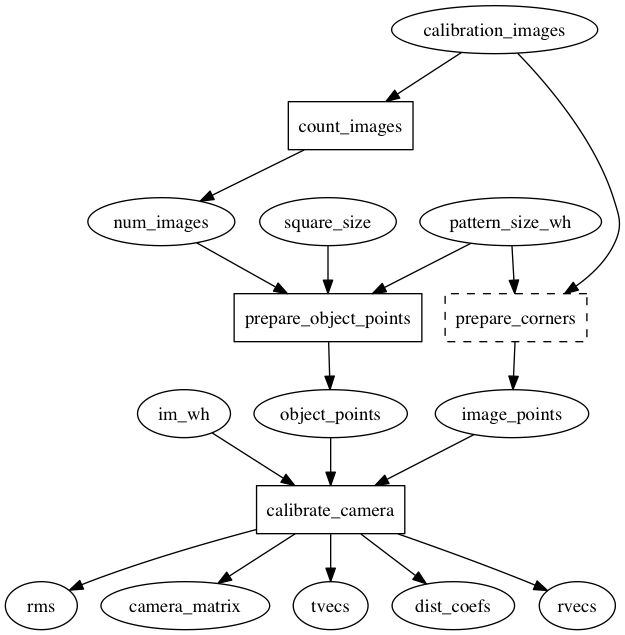

In [87]:
cg_calib = cbcalib.CGCalibrateCamera()
cg_calib_nx = cg_calib.to_networkx()

nxpd.draw(cg_calib_nx)

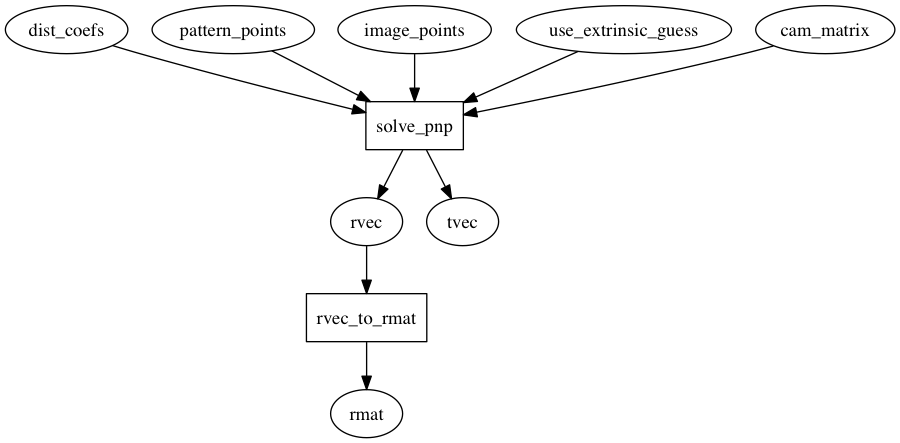

In [88]:
cg_pnp = cbcalib.CGSolvePnP()
nxpd.draw(cg_pnp.to_networkx())

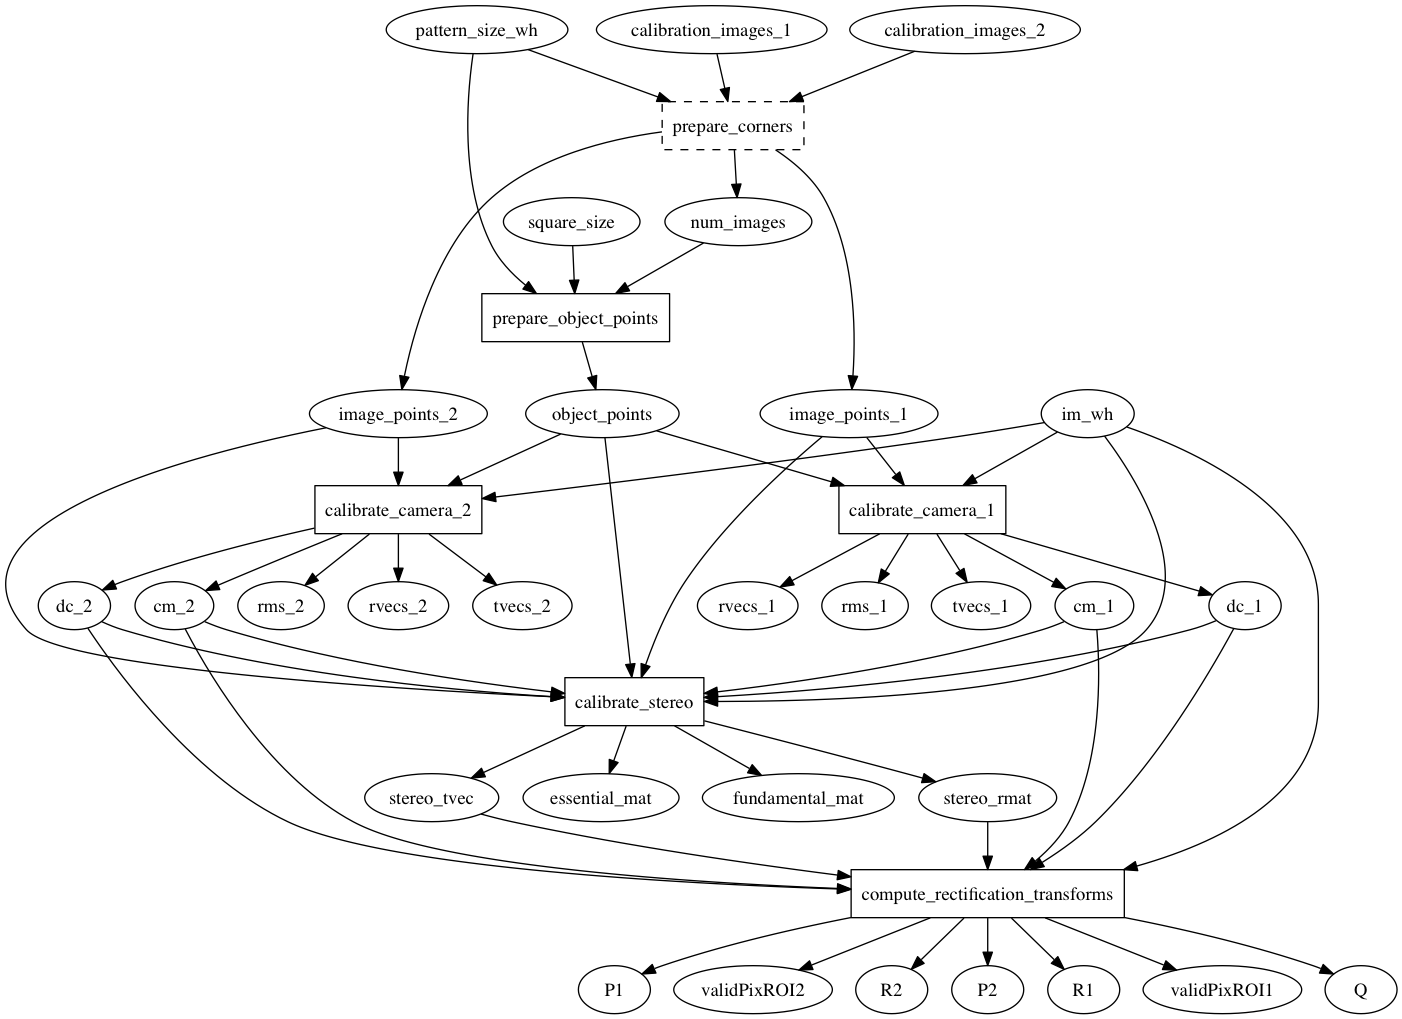

In [94]:
cg_stereocalib = cbcalib.CGCalibrateStereo()
nxpd.draw(cg_stereocalib.to_networkx())